# Necessary Libraries

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import sys
from pathlib import Path
sys.path.append(str(Path('.').absolute().parent))

from algorithms.optimistic_greedy import OptimisticGreedy

# Set Random Seed

In [38]:
np.random.seed(42)

# Pilot run to tune optimistic-greedy

In [39]:
# bandit experiment parameters
num_arms = 10
num_steps = 600
num_runs = 300

## a. Choosing Optimistic Initial value

In [40]:
# optimistic initial values
initial_values = [1.2, 2.0, 5.0, 7.0]

# performance of algorithm
average_reward = []
optimal_action = []

for initial_value in initial_values:

    average_reward_per_run = []
    optimal_action_per_run = []

    for run in range(num_runs):

        # create testbed using optimistic-greedy
        bandit = OptimisticGreedy(num_arms= num_arms, initial_value= initial_value)

        # run experiment to obtain average reward and optimal action per step
        average_reward_per_step, optimal_action_per_step = bandit.run_experiment(num_steps= num_steps)

        average_reward_per_run.append(average_reward_per_step)
        optimal_action_per_run.append(optimal_action_per_step)

    # obtain the average of the runs
    average_reward.append(np.mean(average_reward_per_run, axis= 0))
    optimal_action.append(np.mean(optimal_action_per_run, axis=0))

## Average Reward

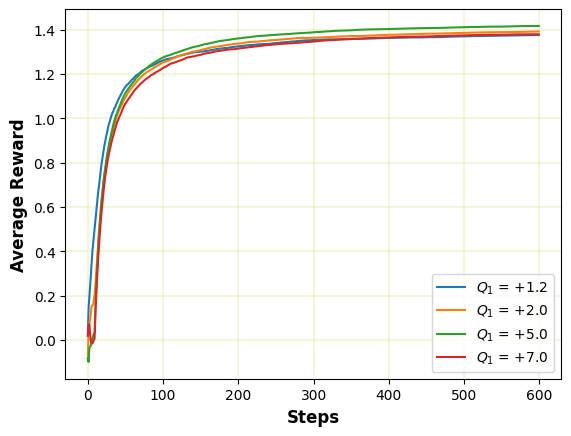

In [41]:
plt.plot(average_reward[0], label = '$Q_1$ = +{}'.format(initial_values[0]))
plt.plot(average_reward[1], label = '$Q_1$ = +{}'.format(initial_values[1]))
plt.plot(average_reward[2], label = '$Q_1$ = +{}'.format(initial_values[2]))
plt.plot(average_reward[3], label = '$Q_1$ = +{}'.format(initial_values[3]))
plt.legend()
plt.xlabel('Steps', weight = 'bold', fontsize = 12)
plt.ylabel('Average Reward', weight = 'bold', fontsize = 12)
plt.grid(color = 'y', linewidth = 0.2)

## Optimal Action

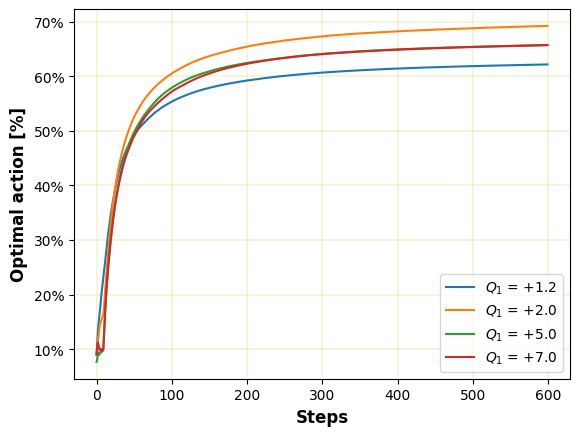

In [42]:
plt.plot(optimal_action[0],  label = '$Q_1$ = +{}'.format(initial_values[0]))
plt.plot(optimal_action[1],  label = '$Q_1$ = +{}'.format(initial_values[1]))
plt.plot(optimal_action[2],  label = '$Q_1$ = +{}'.format(initial_values[2]))
plt.plot(optimal_action[3],  label = '$Q_1$ = +{}'.format(initial_values[3]))
plt.legend()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Steps', weight = 'bold', fontsize = 12)
plt.ylabel('Optimal action [%]', weight = 'bold', fontsize = 12)
plt.grid(color = 'y', linewidth = 0.2)

## b. Using Fixed Step Size (Q1 = +5)

In [43]:
alphas = [0.5, 0.2, 0.1, 0.05, 0.01]

initial_value = 5.0

average_reward_for_fixed = []
optimal_action_for_fixed = []

for alpha in alphas:
    
    average_reward_per_run = []
    optimal_action_per_run = []

    for run in range(num_runs):

        # create testbed 
        bandit = OptimisticGreedy(num_arms= num_arms, initial_value= initial_value, alpha= alpha)

        # run experiment to obtain average reward and optimal action per step
        average_reward_per_step, optimal_action_per_step = bandit.run_experiment(num_steps= num_steps)

        average_reward_per_run.append(average_reward_per_step)
        optimal_action_per_run.append(optimal_action_per_step)

    # obtain the average of the runs
    average_reward_for_fixed.append(np.mean(average_reward_per_run, axis= 0))
    optimal_action_for_fixed.append(np.mean(optimal_action_per_run, axis=0))

## Average Reward

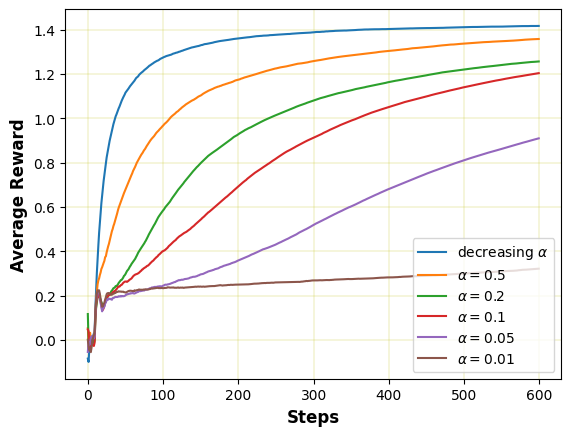

In [44]:
# the chosen initial value for decreasing step size, Q1= 0.1
plt.plot(average_reward[2], label = 'decreasing $\\alpha$')

# for fixed step size
plt.plot(average_reward_for_fixed[0], label = '$\\alpha = {}$'.format(alphas[0]))
plt.plot(average_reward_for_fixed[1], label = '$\\alpha = {}$'.format(alphas[1]))
plt.plot(average_reward_for_fixed[2], label = '$\\alpha = {}$'.format(alphas[2]))
plt.plot(average_reward_for_fixed[3], label = '$\\alpha = {}$'.format(alphas[3]))
plt.plot(average_reward_for_fixed[4], label = '$\\alpha = {}$'.format(alphas[4]))
plt.legend()
plt.xlabel('Steps', weight = 'bold', fontsize = 12)
plt.ylabel('Average Reward', weight = 'bold', fontsize = 12)
plt.grid(color = 'y', linewidth = 0.2)

## Optimal Action

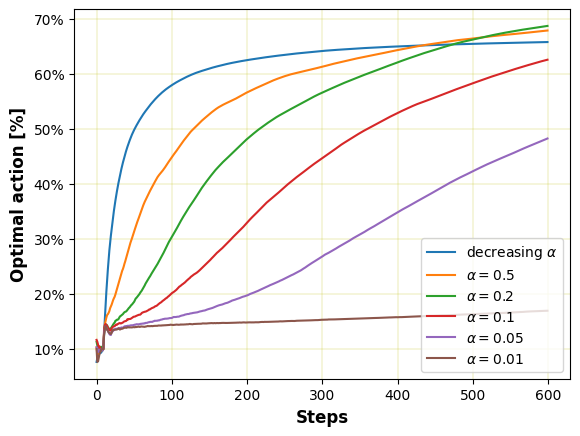

In [45]:
# the chosen initial value for decreasing step size, Q1= 0.1
plt.plot(optimal_action[2], label = 'decreasing $\\alpha$')

# for fixed step size
plt.plot(optimal_action_for_fixed[0], label = '$\\alpha = {}$'.format(alphas[0]))
plt.plot(optimal_action_for_fixed[1], label = '$\\alpha = {}$'.format(alphas[1]))
plt.plot(optimal_action_for_fixed[2], label = '$\\alpha = {}$'.format(alphas[2]))
plt.plot(optimal_action_for_fixed[3], label = '$\\alpha = {}$'.format(alphas[3]))
plt.plot(optimal_action_for_fixed[4], label = '$\\alpha = {}$'.format(alphas[4]))
plt.legend()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel('Steps', weight = 'bold', fontsize = 12)
plt.ylabel('Optimal action [%]', weight = 'bold', fontsize = 12)
plt.grid(color = 'y', linewidth = 0.2)